# Visualization 1: Interactive using Data from Wine Spectator

# Visualizing Wine Tasting Notes
Wine tasting is an old tradition, which results in famous oenophiles rating wines, and providing a (sometimes very provacative) tasting note, describing the flavors present in the wine. What kinds of words do professional wine tasters use in these notes? Has use of certain words changed over time? Are certain types of wine more prevalent than others?

In [1]:
# link for binder: http://mybinder.org/v2/gh/kabner77/kabner77.github.io/master
# link for html renderer: https://html-online.com/editor/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipyw
import bqplot
%matplotlib inline

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
# adapted code offered by Jill Naiman
from collections import Counter

years = wine['Top_100_Year'] # possible x values

# using ideas from week 5:
@ipyw.interact(SearchTerm = "Try oak, chocolate, or fruity")

def plot_line(SearchTerm):     
    mask = wine['Description'].str.find(str(SearchTerm)) != -1 # search term there?
    new_wine = years[mask]
    plotvals = dict(Counter(new_wine.values))
    yvalues = plotvals.values() # counts of that word occ. by year
    xvalues = plotvals.keys()
    plt.plot(xvalues, yvalues, color='#A72920')
    plt.xlabel('WineSpectator Top 100 Year')
    plt.ylabel('Number of wines with ' + SearchTerm + ' in the desc.')
    plt.rcParams['figure.dpi'] = 150


interactive(children=(Text(value='Try oak, chocolate, or fruity', description='SearchTerm'), Output()), _dom_c…

# Visualization using Data from Cellar Tracker

In [5]:
ctwine = pd.read_csv('cellar_500.csv')

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

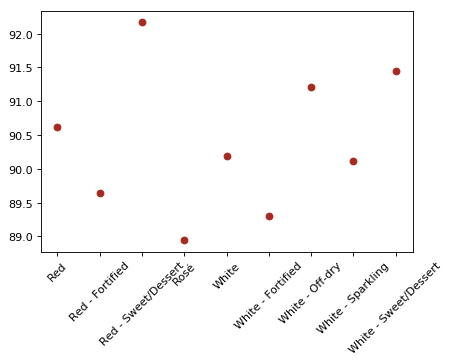

In [25]:
# two plots, one showing Country vs. Score
# should be something related to years or words like the other plot, but idk
# tasting notes network viz? can use other vizzes, doesn't have to be things we make 
# something with the type/color to show which words are used for certain wines? 
# avg scores by year for critic and amateur
# avg score for each type of wine


# # plt.plot(scorebyloc)
# # plt.xticks(rotation=45)

scorebycolor = ctwine.groupby('Type')['CScore'].mean()
x_scat = scorebycolor.index
y_scat = scorebycolor.values
scatter = plt.scatter(x_scat, y_scat, color='#A72920')
plt.rcParams['figure.dpi'] = 80
plt.xticks(rotation=45)
# # need to use plt.subplot?? look back at other notebooks/notes from class


In [41]:
# doing the side by side in bqplot

xscatter = colors.index
yscatter = colors.values

x_sc_scatter = bqplot.OrdinalScale()
y_sc_scatter = bqplot.OrdinalScale()

scatters = bqplot.Scatter(x=xscatter, y=yscatter, scales={'x':x_sc_scatter, 'y':y_sc_scatter})
ax_x_scatter = bqplot.Axis(scale = x_sc_scatter, label='Type of Wine', reverse=True)
ax_y_scatter = bqplot.Axis(scale = y_sc_scatter, label = 'Average Amateur Score of Wine', orientation='vertical', label_offset='50px', side='left')

figscatter = bqplot.Figure(marks=[scatters], axes=[ax_x_scatter, ax_y_scatter])
display(figscatter)

Figure(axes=[Axis(label='Type of Wine', scale=OrdinalScale()), Axis(label='Average Amateur Score of Wine', lab…

However, we should note the amount of wines of each type in the dataset. Sweet/dessert reds seem to be killing it, but there's actually only one wine of that category present!

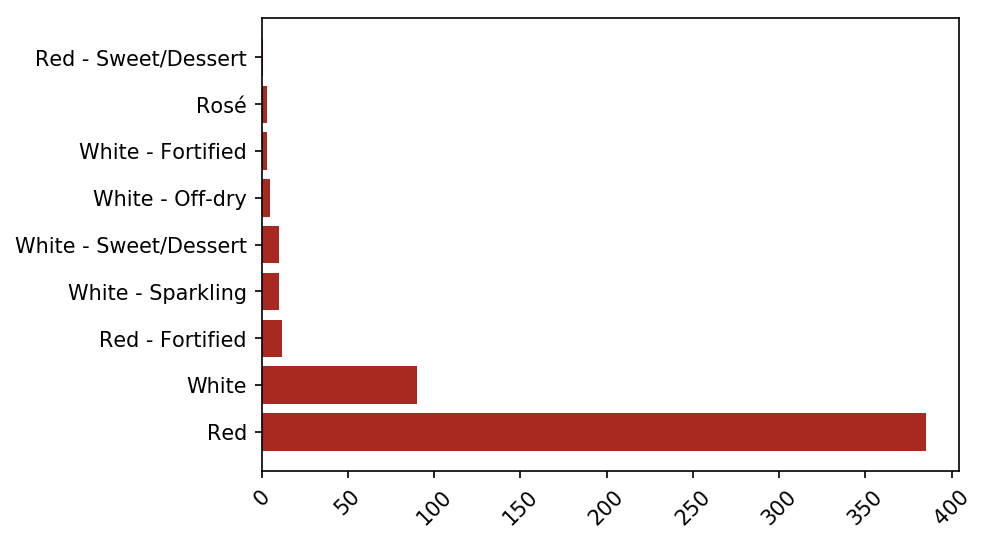

In [20]:
colors = ctwine['Type'].value_counts()
bar = plt.barh(colors.index, colors.values, color='#A72920')
plt.xticks(rotation=45)
plt.rcParams['figure.dpi'] = 80